In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np


In [9]:
!unzip drive-download-20240612T062942Z-001.zip

Archive:  drive-download-20240612T062942Z-001.zip
  inflating: input.csv               
  inflating: labels_test.csv         
  inflating: labels.csv              
  inflating: input_test.csv          


In [10]:
X_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv', delimiter=',')

X_test=np.loadtxt('input_test.csv', delimiter=',')
y_test=np.loadtxt('labels_test.csv', delimiter=',')


In [12]:
print("Shape of X_train : ", X_train.shape)  #100x100x3 channels RGB
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of X_test :  (400, 30000)
Shape of y_test :  (400,)


In [15]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [16]:
print("Shape of X_train : ", X_train.shape)  #100x100x3 channels RGB
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [17]:
X_train[1,:] #values range from 0 to 255. To train model, we need to rescale the values 0 to 1, So divide it with 255

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [18]:
X_train=X_train/255.0
X_test=X_test/255.0

In [19]:
X_train[1,:] # values ranging from 0 to 1.

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [22]:
## Display images
import matplotlib.pyplot as plt
import random

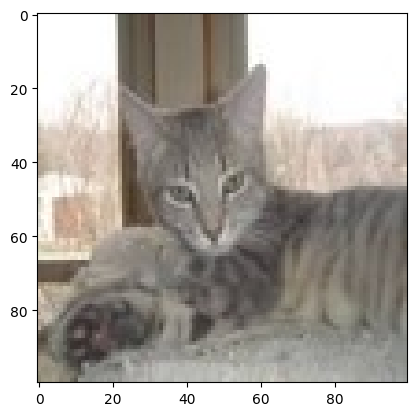

In [29]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])

# **Model**

In [31]:
model=Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)), #dimension of filter 3x3
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'), #64 neurons in the layer
    Dense(1, activation = 'sigmoid')
])

In [33]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics =['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 45s 1s/step - loss: 0.6950 - accuracy: 0.5420
Epoch 2/5
32/32 [==============================] - 28s 889ms/step - loss: 0.6551 - accuracy: 0.6190
Epoch 3/5
32/32 [==============================] - 39s 1s/step - loss: 0.6153 - accuracy: 0.6685
Epoch 4/5
32/32 [==============================] - 28s 890ms/step - loss: 0.5417 - accuracy: 0.7320
Epoch 5/5
32/32 [==============================] - 28s 892ms/step - loss: 0.4992 - accuracy: 0.7545


# **making predictions**

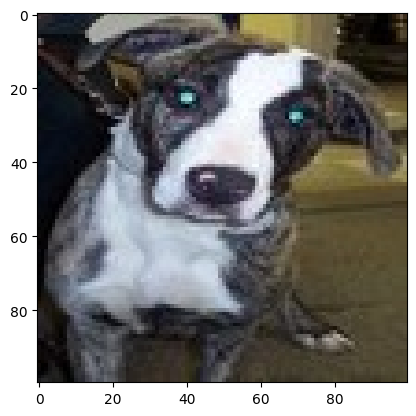

1/1 [==============================] - 0s 47ms/step
This is a dog


In [46]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred= model.predict(X_test[idx2, :].reshape(1,100,100,3))
if y_pred>0.5 :
  print ("This is a cat.")
else:
  print("This is a dog")